In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/janatahackhealthcareanalytics/test_l0Auv8Q.csv
/kaggle/input/janatahackhealthcareanalytics/sample_submmission.csv
/kaggle/input/janatahackhealthcareanalytics/Train_2/Train/Data_Dictionary.xlsx
/kaggle/input/janatahackhealthcareanalytics/Train_2/Train/Patient_Profile.csv
/kaggle/input/janatahackhealthcareanalytics/Train_2/Train/First_Health_Camp_Attended.csv
/kaggle/input/janatahackhealthcareanalytics/Train_2/Train/Third_Health_Camp_Attended.csv
/kaggle/input/janatahackhealthcareanalytics/Train_2/Train/Health_Camp_Detail.csv
/kaggle/input/janatahackhealthcareanalytics/Train_2/Train/Train.csv
/kaggle/input/janatahackhealthcareanalytics/Train_2/Train/Second_Health_Camp_Attended.csv


In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve,roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import roc_auc_score , roc_curve
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)

In [74]:
test = pd.read_csv('/kaggle/input/janatahackhealthcareanalytics/test_l0Auv8Q.csv')
train = pd.read_csv('/kaggle/input/janatahackhealthcareanalytics/Train_2/Train/Train.csv')
first_health_camp = pd.read_csv('/kaggle/input/janatahackhealthcareanalytics/Train_2/Train/First_Health_Camp_Attended.csv')
second_health_camp = pd.read_csv('/kaggle/input/janatahackhealthcareanalytics/Train_2/Train/Second_Health_Camp_Attended.csv')
patient_profile = pd.read_csv('/kaggle/input/janatahackhealthcareanalytics/Train_2/Train/Patient_Profile.csv')
third_health_camp = pd.read_csv('/kaggle/input/janatahackhealthcareanalytics/Train_2/Train/Third_Health_Camp_Attended.csv')
health_camp = pd.read_csv('/kaggle/input/janatahackhealthcareanalytics/Train_2/Train/Health_Camp_Detail.csv')
sub=pd.read_csv('/kaggle/input/janatahackhealthcareanalytics/sample_submmission.csv')

In [75]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [76]:
first_health_camp.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN


In [77]:
second_health_camp.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


In [78]:
third_health_camp.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2


In [79]:
patient_profile.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others


In [80]:
health_camp.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1


In [81]:
train['Registration_Date'].nunique()

1201

In [82]:
len(train)

75278

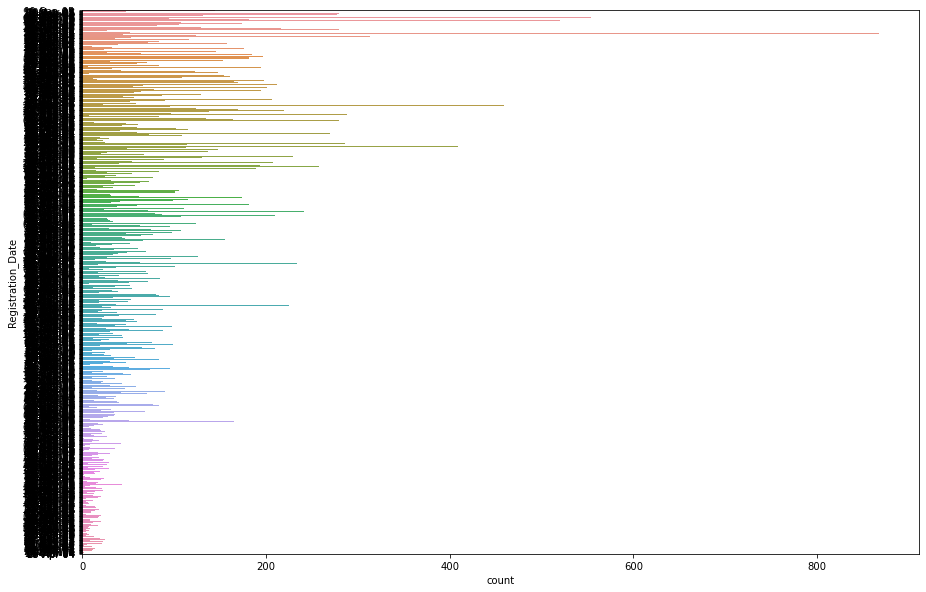

In [83]:
plt.figure(figsize=(15,10))
sns.countplot(y=train['Registration_Date'])

In [84]:
train['Patient_ID'].nunique()

29828

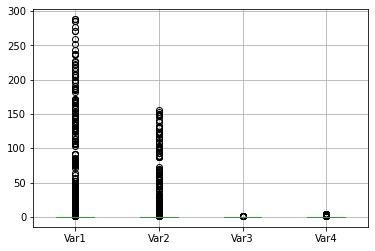

In [85]:
train[['Var1','Var2','Var3','Var4']].boxplot()

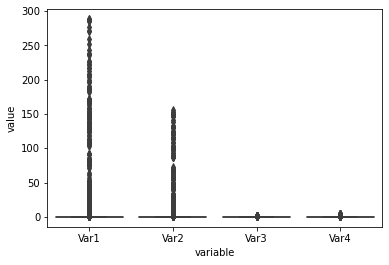

In [86]:
sns.boxplot(x="variable", y="value", data=pd.melt(train[['Var1','Var2','Var3','Var4']]))

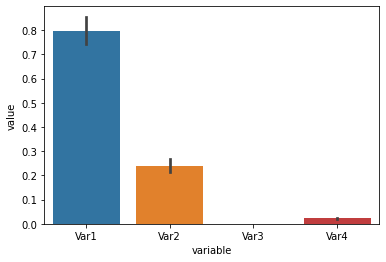

In [87]:
sns.barplot(x='variable',y='value',data=pd.melt(train[['Var1','Var2','Var3','Var4']]))

In [88]:
data=pd.melt(train[['Var1','Var2','Var3','Var4']])

In [89]:
data.head()

,variable,value
0,Var1,4
1,Var1,45
2,Var1,0
3,Var1,0
4,Var1,15


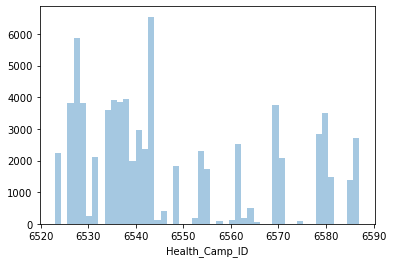

In [90]:
sns.distplot(train['Health_Camp_ID'],kde=False)

In [91]:
df= pd.merge(train,health_camp,how='left',on=['Health_Camp_ID'])
df_1= pd.merge(df,patient_profile,how='left',on=['Patient_ID'])
df_2=pd.merge(df_1,first_health_camp,how='left',on=['Patient_ID','Health_Camp_ID'])
df_3=pd.merge(df_2,second_health_camp,how='left',on=['Patient_ID', 'Health_Camp_ID'])
df_final=pd.merge(df_3,third_health_camp,how='left',on=['Patient_ID', 'Health_Camp_ID'])

In [92]:
df_final.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number
0,489652,6578,10-Sep-05,4,0,0,0,2,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
1,507246,6578,18-Aug-05,45,5,0,0,7,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,1,75,40,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,NaN,NaN
2,523729,6534,29-Apr-06,0,0,0,0,0,17-Oct-05,07-Nov-07,Second,A,2,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN
3,524931,6535,07-Feb-04,0,0,0,0,0,01-Feb-04,18-Feb-04,First,E,2,0,0,0,0,None,None,None,07-Feb-04,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,521364,6529,28-Feb-06,15,1,0,0,7,30-Mar-06,03-Apr-06,Second,A,2,0,0,0,1,1,70,40,04-Jul-03,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN


In [93]:
data_1=pd.melt(df_final[['Online_Follower','LinkedIn_Shared','Twitter_Shared','Facebook_Shared']])

In [94]:
data_1.head()

,variable,value
0,Online_Follower,0
1,Online_Follower,0
2,Online_Follower,0
3,Online_Follower,0
4,Online_Follower,0


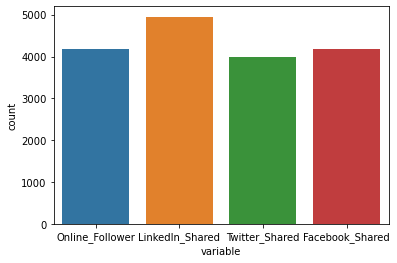

In [95]:
sns.countplot(data_1[data_1['value']==1]['variable'])

In [96]:
df_final['Category1'].value_counts()

First     49892
Second    15114
Third     10272
Name: Category1, dtype: int64

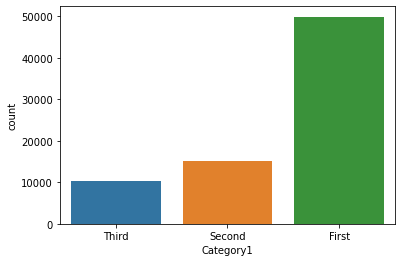

In [97]:
sns.countplot(df_final['Category1'])

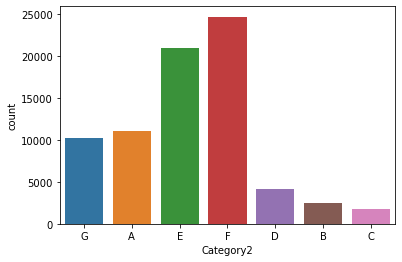

In [98]:
sns.countplot(df_final['Category2'])

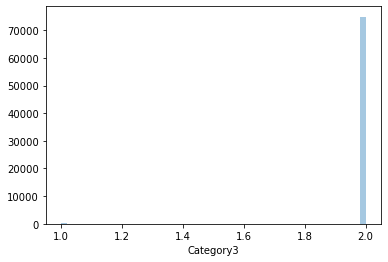

In [99]:
sns.distplot(df_final['Category3'],kde=False)

In [100]:
a=df_final[df_final['Income']!='None']

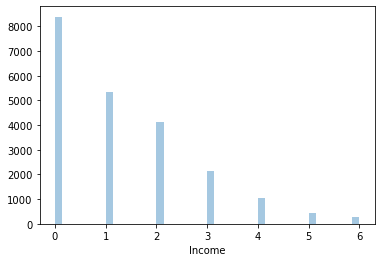

In [101]:
sns.distplot(a['Income'],kde=False)

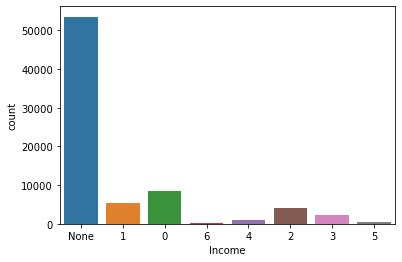

In [102]:
sns.countplot(df_final['Income'])

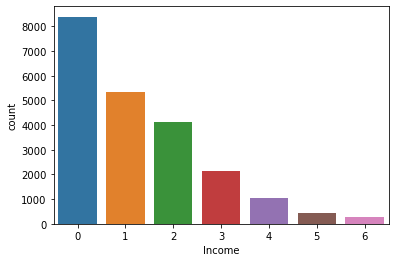

In [103]:
sns.countplot(a['Income'])

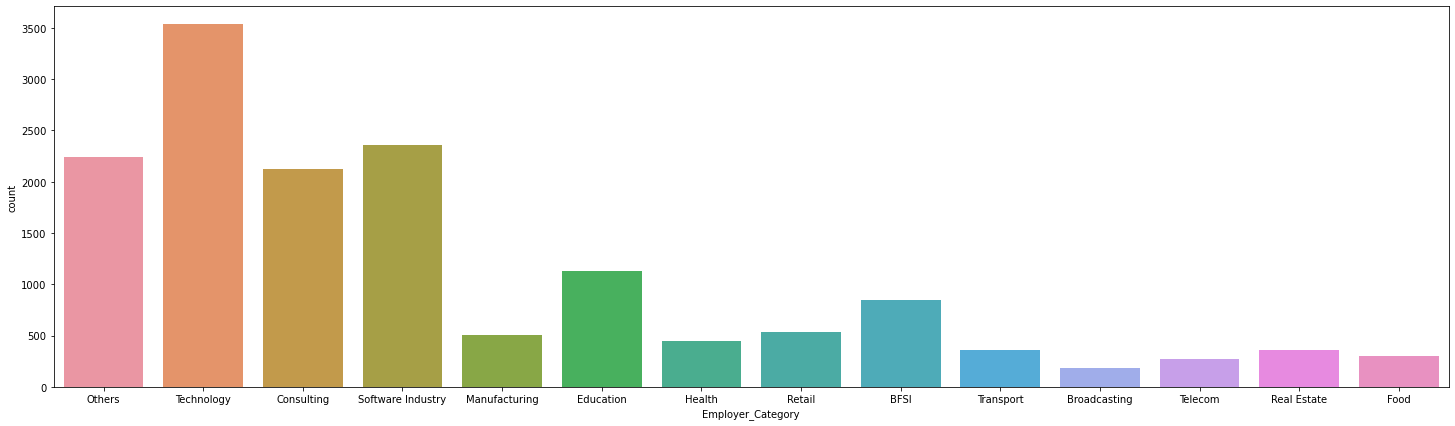

In [104]:
plt.figure(figsize=(25,7))
sns.countplot(df_final['Employer_Category'])

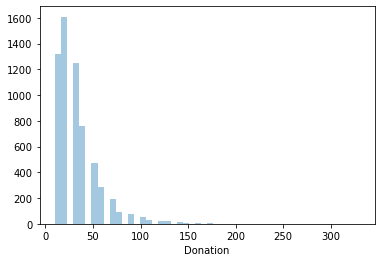

In [105]:
sns.distplot(df_final['Donation'],kde=False)

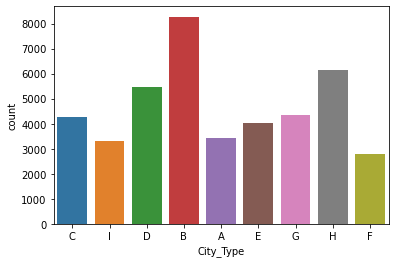

In [106]:
sns.countplot(df_final['City_Type'])

In [107]:
b=df_final[df_final['Age']!='None']

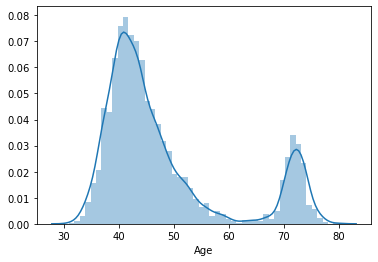

In [108]:
sns.distplot(b['Age'])

In [109]:
c=df_final[df_final['Education_Score']!='None']

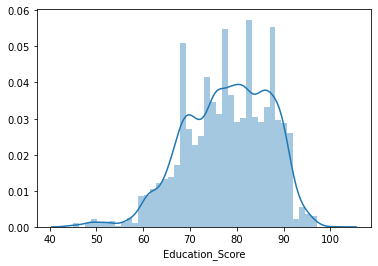

In [110]:
sns.distplot(c['Education_Score'])

In [111]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75278 entries, 0 to 75277
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient_ID                 75278 non-null  int64  
 1   Health_Camp_ID             75278 non-null  int64  
 2   Registration_Date          74944 non-null  object 
 3   Var1                       75278 non-null  int64  
 4   Var2                       75278 non-null  int64  
 5   Var3                       75278 non-null  int64  
 6   Var4                       75278 non-null  int64  
 7   Var5                       75278 non-null  int64  
 8   Camp_Start_Date            75278 non-null  object 
 9   Camp_End_Date              75278 non-null  object 
 10  Category1                  75278 non-null  object 
 11  Category2                  75278 non-null  object 
 12  Category3                  75278 non-null  int64  
 13  Online_Follower            75278 non-null  int

In [112]:
def change_to_int(r):

    if r == 'None':
        return None
    else:
        return float(r)
df_final['Age'] = df_final['Age'].apply(change_to_int)   
df_final['Education_Score'] = df_final['Education_Score'].apply(change_to_int)
df_final['Income'] = df_final['Income'].apply(change_to_int)

In [113]:
a = df_final.isnull().sum()/len(df_final)*100
a[a>0]

Registration_Date              0.443689
Income                        71.131008
Education_Score               86.804910
Age                           68.561864
City_Type                     44.113818
Employer_Category             79.804192
Donation                      91.739951
Health_Score                  91.739951
Unnamed: 4                   100.000000
Health Score                  89.613167
Number_of_stall_visited       91.345413
Last_Stall_Visited_Number     91.345413
dtype: float64

In [114]:
df_final['Age'].median()

44.0

In [115]:
df_final.drop(columns = ['Unnamed: 4'] , inplace = True)
df_final['Age'].fillna(44.0 , inplace = True)
df_final['Employer_Category'].fillna('Unemployed' , inplace = True)
df_final['Income'].fillna(0 , inplace = True)
df_final['Education_Score'].fillna(0 , inplace = True)

In [116]:
df_final.groupby(['Income'])['City_Type'].value_counts()

Income  City_Type
0.0     B            5313
        H            4842
        D            3767
        A            2958
        G            2882
        C            2685
        E            2652
        I            2144
        F            1988
1.0     B             936
        C             732
        D             683
        H             663
        G             559
        E             520
        I             378
        F             368
        A             210
2.0     B            1095
        D             545
        G             463
        E             447
        H             429
        I             420
        C             341
        F             192
        A              87
3.0     B             521
        D             317
        C             252
        E             248
        I             216
        G             192
        F             145
        H             110
        A              85
4.0     B             216
        C           

In [117]:
def fill_city(x):
    City = x[0]
    Income = x[1]
    if pd.isnull(City):
        if Income ==0:
            return 'H'
        else:
            return 'B'
        
    else:
        return City

df_final['City_Type'] = df_final[['City_Type' , 'Income']].apply(fill_city,axis=1)    

In [118]:
df_final.isnull().sum()

Patient_ID                       0
Health_Camp_ID                   0
Registration_Date              334
Var1                             0
Var2                             0
Var3                             0
Var4                             0
Var5                             0
Camp_Start_Date                  0
Camp_End_Date                    0
Category1                        0
Category2                        0
Category3                        0
Online_Follower                  0
LinkedIn_Shared                  0
Twitter_Shared                   0
Facebook_Shared                  0
Income                           0
Education_Score                  0
Age                              0
First_Interaction                0
City_Type                        0
Employer_Category                0
Donation                     69060
Health_Score                 69060
Health Score                 67459
Number_of_stall_visited      68763
Last_Stall_Visited_Number    68763
dtype: int64

In [119]:
def find_outcomes(x):
    first = x[0]
    second = x[1]
    third = x[2]
    if pd.isnull(first) == False:
        return 1
    elif pd.isnull(second) == False:
        return 1
    elif pd.isnull(third) == False:
        if third > 0:
            return 1
        else:
            return 0
    else:
        return 0
        

In [120]:
df_final['Target'] = df_final[['Health_Score' , 'Health Score' , 'Number_of_stall_visited']].apply(find_outcomes,axis =1)

In [121]:
df_final.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Target
0,489652,6578,10-Sep-05,4,0,0,0,2,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,0.0,0.0,44.0,06-Dec-04,H,Unemployed,NaN,NaN,NaN,2.0,1.0,1
1,507246,6578,18-Aug-05,45,5,0,0,7,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,1.0,75.0,40.0,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,NaN,0
2,523729,6534,29-Apr-06,0,0,0,0,0,17-Oct-05,07-Nov-07,Second,A,2,0,0,0,0,0.0,0.0,44.0,22-Jun-04,H,Unemployed,NaN,NaN,0.402054,NaN,NaN,1
3,524931,6535,07-Feb-04,0,0,0,0,0,01-Feb-04,18-Feb-04,First,E,2,0,0,0,0,0.0,0.0,44.0,07-Feb-04,I,Unemployed,NaN,NaN,NaN,NaN,NaN,0
4,521364,6529,28-Feb-06,15,1,0,0,7,30-Mar-06,03-Apr-06,Second,A,2,0,0,0,1,1.0,70.0,40.0,04-Jul-03,I,Technology,NaN,NaN,0.845597,NaN,NaN,1


In [122]:
a = df_final[pd.isnull(df['Registration_Date'])].index 
df_final.drop(a , inplace = True)

In [123]:
import datetime
from datetime import datetime

def convert_datetime(x):
    
    return datetime.strptime(x ,  '%d-%b-%y')

df_final['Registration_Date'] = df_final['Registration_Date'].apply(convert_datetime)
df_final['Camp_Start_Date'] = df_final['Camp_Start_Date'].apply(convert_datetime)
df_final['First_Interaction'] = df_final['First_Interaction'].apply(convert_datetime)
df_final['Camp_End_Date'] = df_final['Camp_End_Date'].apply(convert_datetime)


In [124]:
drop_cols=['Camp_Start_Date','Camp_End_Date','Patient_ID','Health_Camp_ID','Donation',
           'Health_Score','Health Score','Number_of_stall_visited','Last_Stall_Visited_Number',
           'Registration_Date' , 'First_Interaction' ]

df_final.drop(columns = drop_cols , inplace = True)

In [125]:
df_final.head()

,Var1,Var2,Var3,Var4,Var5,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,City_Type,Employer_Category,Target
0,4,0,0,0,2,Third,G,2,0,0,0,0,0.0,0.0,44.0,H,Unemployed,1
1,45,5,0,0,7,Third,G,2,0,0,0,0,1.0,75.0,40.0,C,Others,0
2,0,0,0,0,0,Second,A,2,0,0,0,0,0.0,0.0,44.0,H,Unemployed,1
3,0,0,0,0,0,First,E,2,0,0,0,0,0.0,0.0,44.0,I,Unemployed,0
4,15,1,0,0,7,Second,A,2,0,0,0,1,1.0,70.0,40.0,I,Technology,1


In [126]:
X=df_final.drop('Target',axis=1)
y=df_final['Target']

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [128]:
label_cols = ['Category1','Category2']
encoder = LabelEncoder()
for item in label_cols:
    X_train[item] = encoder.fit_transform(X_train[item])
    X_test[item] = encoder.transform(X_test[item])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [129]:
dummie_cols=['City_Type','Employer_Category']
X_train=pd.get_dummies(X_train,columns=dummie_cols,drop_first=True)
X_test=pd.get_dummies(X_test,columns=dummie_cols,drop_first=True)

In [130]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [131]:
lr_model = LogisticRegression()
lr_model.fit(X_train , y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [132]:
pred_lr = lr_model.predict_proba(X_test)[:,-1]

In [133]:
roc_lr = roc_auc_score(y_test , pred_lr)
roc_lr

0.7978138620851699

In [134]:
model_rf = RandomForestClassifier(n_estimators=324,random_state=101,criterion='entropy')
model_rf.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=324, random_state=101)

In [135]:
pred_rf = model_rf.predict_proba(X_test)[:,-1]

In [136]:
roc_rf = roc_auc_score(y_test , pred_rf)
roc_rf

0.8007569385187709

In [137]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
pred_xgb = model_xgb.predict_proba(X_test)[:,-1]

In [139]:
roc_xgb = roc_auc_score(y_test , pred_xgb)
roc_xgb

0.8164921736138984

In [150]:
model=Sequential()

model.add(Dense(49,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [151]:
early_stop=EarlyStopping(monitor='val_accuracy',mode='min',verbose=1,patience=25)

In [152]:
y_train1=np.array(y_train)
y_test1=np.array(y_test)

In [153]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/10
1874/1874 [==============================] - 4s 2ms/step - loss: 0.4705 - accuracy: 0.7657 - val_loss: 0.4674 - val_accuracy: 0.7734
Epoch 2/10
1874/1874 [==============================] - 4s 2ms/step - loss: 0.4628 - accuracy: 0.7711 - val_loss: 0.4601 - val_accuracy: 0.7741
Epoch 3/10
1874/1874 [==============================] - 4s 2ms/step - loss: 0.4600 - accuracy: 0.7730 - val_loss: 0.4583 - val_accuracy: 0.7735
Epoch 4/10
1874/1874 [==============================] - 4s 2ms/step - loss: 0.4571 - accuracy: 0.7742 - val_loss: 0.4589 - val_accuracy: 0.7739
Epoch 5/10
1874/1874 [==============================] - 4s 2ms/step - loss: 0.4546 - accuracy: 0.7742 - val_loss: 0.4561 - val_accuracy: 0.7740
Epoch 6/10
1874/1874 [==============================] - 4s 2ms/step - loss: 0.4518 - accuracy: 0.7736 - val_loss: 0.4545 - val_accuracy: 0.7746
Epoch 7/10
1874/1874 [==============================] - 4s 2ms/step - loss: 0.4496 - accuracy: 0.7748 - val_loss: 0.4530 - val_accuracy:

In [154]:
pred_learning=model.predict_proba(X_test)

In [155]:
learning_auc=roc_auc_score(y_test,pred_learning)
learning_auc

0.8111753126226122